In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
#### TASK 1 #####

In [2]:
### CELLS BELOW ARE FOR CLEANING AND IMPORTING DATASET 1 AS NUMPY ARRAY ###

In [3]:
# 1. Import the data
df = pd.read_csv("dataset_1/ionosphere.data",header=None)

In [4]:
# 2. Inspect the data

# 2.1 Remove any columns whose entries are all the same
    # function that outputs the features (column indices) that are the same across instances;
def same_vals(df, num):
    n = 0
    for i in range(len(df)-1):
        if (df.iloc[i,num] != df.iloc[i+1,num]):
            n +=1
    if (n==0):
        print(num)
        
for feature_num in range(len(df.columns)):
    same_vals(df,feature_num)

1


In [5]:
# 2.2 check if any of the columns are not numerical
for i in range(len(df.columns)):
    if (df[i].dtype != "int64"):
        if (df[i].dtype != "float64"):
            print(i)

34


In [6]:
# 3. Clean the data

# 3.1 From section 2.1, we found out that column 1 can be removed:
df = df.drop(df.columns[1],axis=1)
df.head()

,0,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [7]:
# 3.2 From section 2.2, we found out that column 34 does not contain numerical data
    # Convert the chars in column 34 into integers
    # where g ("good") = 1, b ("bad) = 0
j = len(df.columns)-1
for i in range(len(df)):
    if (df.iloc[i,j] == "b"):
        df.iloc[i,j] = 0
    else:
        df.iloc[i,j] = 1
df[34] = pd.to_numeric(df[34])

In [8]:
# 3.3 Convert all of the data into floats!
for i in range(len(df.columns)+1):
    if (i != 1): # recall: column 1 was removed
        if (df[i].dtype != "float64"):
            df[i] = df[i].astype(float)
df.dtypes

0     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
dtype: object

In [9]:
# 4. Creating numpy array that will be the model input

# N X D matrix with the features of each instance
X_1 = df.iloc[:,0:33]
X_1 = X_1.values
X_1.shape

(351, 33)

In [10]:
# N X 1 matrix with the label of each instance
Y_1 = df[34]
Y_1 = Y_1.values.reshape(351) # NOTE THIS
Y_1.shape

(351,)

In [11]:
# D X 1 matrix with the one hot encoding of each feature type
    # where 0 = continuous data
    # 33 features since we removed col 1 and col 4 represents our labels
tag_1 = np.zeros((33,1),dtype=float)
print (tag_1)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [123]:
### CELLS BELOW CLEAN AND IMPORT DATASET 2 (CENSUS INCOME) AS NUMPY ARRAY

In [124]:
############################################
########## 1. Import the data ##############
############################################
df = pd.read_csv("dataset_2/adult.data", header=None, skipinitialspace=True) # added skipinitialspace=True to deal with whitespace

In [125]:
###################################################
#### 2. Remove Instances with Missing Features ####
###################################################

for j in list(df):
    if (df.dtypes[j] == 'object'):
        df = df[df[j] != '?']

In [126]:
############################################
########## 3. Inspect the data #############
############################################

#### 3.1 Do we have any features (column indices) that are the same across instances? No!
def same_vals(df, num):
    n = 0
    for i in range(len(df)-1):
        if (df.iloc[i,num] != df.iloc[i+1,num]):
            n +=1
    if (n==0):
        print(num)
        
for feature_num in range(len(df.columns)):
    same_vals(df,feature_num)

In [127]:
########################################################
##### 4. One-hot encoding of categorical variables ##### 
########################################################

#### 4.1 creation of dummy variables
for j in list(df):
    if (df.dtypes[j] == 'object'):
        df2 = pd.get_dummies(df[j])
        df = pd.concat([df,df2],axis=1)

#### 4.2 Removing redundant columns

a = [] # indices of cols for which dummy variables were created
for j in list(df):
    if (df.dtypes[j] == 'object'):
        a.append(j)
df=df.drop(a,axis=1)

df=df.drop(["<=50K"],axis=1) # redundant to keep both the "<=50K" and ">50K" cols
df=df.drop(["Male"],axis=1) # redundant to keep both the Male (0) and Female (1) cols

#### 4.3 Re-indexing the columns

columns = dict(map(reversed, enumerate(df.columns)))
df = df.rename(columns=columns)

In [128]:
#####################################
#### 5. Convert data into floats ####
#####################################

for i in range(len(df.columns)):
    if (df[i].dtype != "float64"):
        df[i] = df[i].astype(float)

In [129]:
##############################################################
#### 6. Create numpy arrays that will contain model input ####
##############################################################

# N X D matrix with the features of each instance
X_2 = df.iloc[:,0:103]
X_2 = X_2.values

# now rescale entries in X_2 for numerical stability
for j in range(0,X_2.shape[1]):
    col = X_2[:,j]
    max_val = np.amax(col)
    min_val = np.amin(col)
    X_2[:,j] = 0.1*(col - min_val)/(max_val - min_val)
    

In [130]:
# N X 1 matrix with the label of each instance
Y_2 = df[103]
Y_2 = Y_2.values.reshape(30162)

In [20]:
# D X 1 matrix with the encoding of each feature type, where
    # 0 = continuous data
    # 1 = binary data
    # 2 = features converted into binary via one-hot encoding
#tag = np.zeros((103,1),dtype=float)
tag1 = np.zeros((6,1),dtype=float)
tag2 = np.full((55,1), 2,dtype=float)
tag3 = np.ones((1, 1),dtype=float)
tag4 = np.full((41,1), 2,dtype=float)
tag_2 = np.concatenate((tag1,tag2,tag3,tag4),axis=0)
print(tag_2)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [21]:
### CELLS BELOW CLEAN AND IMPORT DATASET 3 (WISCONSIN BREAST CANCER) AS NUMPY ARRAY

In [22]:
############################################
########## 1. Import the data ##############
############################################

df = pd.read_csv("dataset_3/breast-cancer-wisconsin.data",header=None)
df.shape

(699, 11)

In [23]:
############################################
########## 2. Inspect the data #############
############################################

#### 2.1 Are there any columns whose entries are all the same? No!
    
def same_vals(df, num):
    n = 0
    for i in range(len(df)-1):
        if (df.iloc[i,num] != df.iloc[i+1,num]):
            n +=1
    if (n==0):
        print(num)
        
for feature_num in range(len(df.columns)):
    same_vals(df,feature_num)

In [24]:
#### 2.2 check if any of the columns are not numerical
for i in range(len(df.columns)):
    if (df[i].dtype != "int64"):
        if (df[i].dtype != "float64"):
            print(i)

6


In [25]:
###################################################
#### 3. Remove Instances with Missing Features ####
###################################################

    # instances with missing features denoted by "?";
    # from step 2.2, we know that these missing
    # features can only be found in column 6.

#### 3.1 Find all the possible unique values of column 6
print(df[6].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [26]:
# 3.2 Only keep the rows that do not have "?" in column 6:
df = df[df[6].str.contains('1') | df[6].str.contains('10') | df[6].str.contains('2')
        | df[6].str.contains('4')| df[6].str.contains('3')| df[6].str.contains('9')
        | df[6].str.contains('7')| df[6].str.contains('5')| df[6].str.contains('8')
        | df[6].str.contains('6')]

In [27]:
########################################
#### 4. Binarize the output classes ####
########################################

    # benign tumour = 0, malignant tumour = 1
    
for i in range(len(df)):
    if (df.iloc[i,10] == 2):
        df.iloc[i,10] = 0
    else:
        df.iloc[i,10] = 1

In [28]:
#####################################
#### 5. Convert data into floats ####
#####################################

for i in range(len(df.columns)):
    if (df[i].dtype != "float64"):
        df[i] = df[i].astype(float)

In [29]:
#################################
#### 6. Finish cleaning data ####
#################################

# remove column 0 (subject numbers), since it is not necessary
df = df.drop(df.columns[0],axis=1)

In [30]:
##############################################################
#### 7. Create numpy arrays that will contain model input ####
##############################################################

# N X D matrix with the features of each instance

X_3 = df.iloc[:,0:9]
X_3 = X_3.values

In [31]:
# N X 1 matrix with the label of each instance
Y_3 = df[10]
Y_3 = Y_3.values.reshape(683)

In [32]:
# D X 1 matrix with the one hot encoding of each feature type
    # where 0 = continuous data
    # 33 features since we removed col 1 and col 4 represents our labels
tag_3 = np.zeros((9,1),dtype=float)

In [33]:
### CELLS BELOW CLEAN AND IMPORT DATASET 4 (HABERMAN) AS NUMPY ARRAY

In [34]:
############################################
########## 1. Import the data ##############
############################################

df = pd.read_csv("dataset_4/haberman.data",header=None)

In [35]:
############################################
########## 2. Inspect the data #############
############################################

#### 2.1 Are there any columns whose entries are all the same? No!
    
def same_vals(df, num):
    n = 0
    for i in range(len(df)-1):
        if (df.iloc[i,num] != df.iloc[i+1,num]):
            n +=1
    if (n==0):
        print(num)
        
for feature_num in range(len(df.columns)):
    same_vals(df,feature_num)

In [36]:
#### 2.2 Are there any columns that are non numerical? No!
for i in range(len(df.columns)):
    if (df[i].dtype != "int64"):
        if (df[i].dtype != "float64"):
            print(i)
            
#### 2.3 Are there any instances with missing features?
    # Not according to the documentation

In [37]:
###################################################
#### 3. Remove Instances with Missing Features ####
###################################################

#### There are none!

In [38]:
########################################
#### 4. Binarize the output classes ####
########################################

    # 1 = the patient survived 5 yrs or longer; 0 = the patient died within 5 yrs
for i in range(len(df)):
    if (df.iloc[i,3] == 2):
        df.iloc[i,3] = 0

In [39]:
#####################################
#### 5. Convert data into floats ####
#####################################

for i in range(len(df.columns)):
    if (df[i].dtype != "float64"):
        df[i] = df[i].astype(float)

In [40]:
##############################################################
#### 6. Create numpy arrays that will contain model input ####
##############################################################

# N X D matrix with the features of each instance

X_4 = df.iloc[:,0:3]
X_4 = X_4.values

In [41]:
# N X 1 matrix with the label of each instance
Y_4 = df[3]
Y_4 = Y_4.values.reshape(306)

In [42]:
# D X 1 matrix with the one hot encoding of each feature type
    # where 0 = continuous data
tag_4 = np.zeros((3,1),dtype=float)

In [ ]:
##### TASK 2 #######

In [131]:
#!/usr/bin/env python
# coding: utf-8


class LogisticReg:
    """Implements logistic regression"""

    def __init__(self, 
                 features, # NxD numpy array, 
                 responses # Nx1 numpy array
                ):
        """Creates new instance of class LogisticReg"""
        self.X = features # NxD design matrix - N training examples, D features
        self.y = responses # Nx1 array of dependent variables
        self.N = self.y.shape[0]
        self.D = self.X.shape[1]
        # self.w = np.zeros(self.D)
        self.w = np.random.random_sample(self.D) # random weight initialization
        
    def logistic_cost(self, 
                      w # Dx1 numpy array
                     ):
        """Evaluates cross entropy cost function at weight vector w"""
        z = np.dot(self.X,w) # Nx1 array of logits
        J = np.sum(self.y*np.log1p(np.exp(-z)) + (1-self.y)*np.log1p(np.exp(z))) # scalar
        return J
    
    def logistic_grad(self,
                      w # Dx1 numpy array
                     ):
        """Evaluates gradient of cross entropy cost at weight vector w"""
        z = np.dot(self.X,w) # Nx1 array of logits
        y_hat = 1./(1+np.exp(-z)) # Nx1
        gradn = (self.X.T * (self.y - y_hat)).T # NxD
        grad = gradn.sum(axis=0) # 1xD
        return grad
    
    def fit(self,
            rate, # learning rate
            tol, # termination threshold
           ):
        """Trains logistic model by using gradient descent to compute optimal w"""
        weight = self.w
        J = self.logistic_cost(weight) # initial cost
        costpath = np.array([J]) # will store cost at each iteration
        diff = tol+1 # initialize with any number > tol
        iters = 0 # number of iterations
        while (diff > tol) and (iters < 1000):
            J_old = J
            grad = self.logistic_grad(weight)
            weight = weight + rate*grad
            J = self.logistic_cost(weight)
            costpath = np.concatenate((costpath,np.array([J])))
            diff = J_old - J # >0 since cost decreases with each iteration
            iters = iters+1
        self.w = weight # assign optimal weights to attribute w
        #plt.plot(costpath) # comment this out if you don't want a cost path plot
        return iters
    
    def fit_armijo(self,
                   tol, # termination threshold
                   ):
        """Trains logistic model by using gradient descent with Armijo backtracking to compute optimal w"""
        weight = self.w
        J = self.logistic_cost(weight) # initial cost
        costpath = np.array([J]) # will store cost at each iteration
        diff = tol+1 # initialize with any number > tol
        iters = 0 # number of iterations
        while (diff > tol) and (iters < 1000):
            J_old = J
            grad = self.logistic_grad(weight)
            # Armijo backtracking with parameters b,s to approximate optimal learning rate
            b = 0.1
            s = 0.01
            k = 0
            while (self.logistic_cost(weight + (np.power(b,k))*grad)) > (self.logistic_cost(weight) - (np.power(b,k))*s*np.power(np.linalg.norm(grad),2)):
                k = k+1
            rate = np.power(b,k)
            weight = weight + rate*grad
            J = self.logistic_cost(weight)
            costpath = np.concatenate((costpath,np.array([J])))
            diff = J_old - J # >0 since cost decreases with each iteration
            iters = iters+1
        self.w = weight # assign optimal weights to attribute w
        #plt.plot(costpath) # comment this out if you don't want a cost path plot
        return iters
    
    def predict(self,
                X, # matrix of M examples and D features for which we want to make predictions
                ):
        """Takes X as input and outputs Mx1 vector pred of predictions based on current model weights"""
        z = np.dot(X,self.w) # Mx1 array of logits
        y_hat = 1./(1+np.exp(-z)) # Mx1
        pred = np.around(y_hat) # threshold at 0.5 to obtain binary predictions
        return pred
    
    


# In[ ]:


class NaiveBayes:
    """Implements a Naive Bayes classifier"""
    
    def __init__(self, 
                 features, # NxD numpy array 
                 responses, # Nx1 numpy array
                 tags # 1xD array, where tags[d]=0 if d-th feature is continuous, tags[d]=1 if Bernoulli, tags[d]=2 if part of the one-hot encoding of a categorical feature
                ):
        """Creates new instance of class NaiveBayes"""
        self.X = features # NxD design matrix - N training examples, D features
        self.y = responses # Nx1 array of dependent variables
        self.N = self.y.shape[0]
        self.D = self.X.shape[1]
        self.P = np.zeros((4,self.D)) # 4xD array of parameters initialized to 0 - no more than 4 params per feature
        self.tags = tags # Dx1 array of tags for each feature - to select correct likelihood
        eps = 0.0001 # small constant to add to standard deviation and prior to avoid division by 0 or log(0)
        # learn parameters upon creation of instance of NaiveBayes
        
        self.prior_param = np.mean(self.y)+eps # Bernoulli prior since we're doing binary classification
        
        # now learn likelihood parameters
        for d in range(0,self.D):
            feat = self.X[:,d] # extract d-th column from design matrix
            # first determine if feature is continuous or binary
            if self.tags[d]>0: # if this is true then row is binary vector - either Bernoulli or categorical feature
                feat_0 = feat[self.y==0]
                feat_1 = feat[self.y==1]
                self.P[0,d] = np.mean(feat_0)+eps # assign parameter w_(d,0) to (0,d)-th entry of P
                self.P[1,d] = np.mean(feat_1)+eps # assign parameter w_(d,1) to (1,d)-th entry of P
            else: # if the above condition fails then the feature is continuous - use Gaussian likelihood
                # need to estimate class-conditional means and variances
                feat_0 = feat[self.y==0]
                feat_1 = feat[self.y==1]
                self.P[0,d] = np.mean(feat_0) # assign parameter mu_(d,0) to (0,d)-th entry of P
                self.P[1,d] = np.mean(feat_1) # assign parameter mu_(d,1) to (1,d)-th entry of P
                self.P[2,d] = np.std(feat_0)+eps # assign parameter s_(d,0) to (2,d)-th entry of P
                self.P[3,d] = np.std(feat_1)+eps # assign parameter s_(d,1) to (3,d)-th entry of P
        # print(self.P)
        
    def predict(self,
                X, # matrix of M examples and D features for which we want to make predictions
               ):
        """Takes X as input and outputs Mx1 vector pred of predictions based on max likelihood parameter estimates"""
        # first compute posterior class probabilities (ignoring normalization constant)
        # start with probabilities for class 0
        posterior_0 = np.log((1-self.prior_param))*np.ones(X.shape[0]) # prior probability of each test example being in class 0
        for d in range(0,self.D):
            test_feat = X[:,d] # extract d-th column from matrix of features of test examples
            if self.tags[d]==0: # use Gaussian likelihood
                mu_d = self.P[0,d]
                s_d = self.P[2,d]
                log_likelihood_d =  -1*(np.log(s_d) + np.power(test_feat-mu_d,2)/(2*s_d))
                posterior_0 = posterior_0 + log_likelihood_d
            if self.tags[d]==1: # use Bernoulli likelihood
                p_d = self.P[0,d]
                log_likelihood_d = np.log(p_d)*test_feat + np.log(1-p_d)*(1-test_feat)
                posterior_0 = posterior_0 + log_likelihood_d
            if self.tags[d]==2: # use multinomial likelihood
                p_d = self.P[0,d]
                log_likelihood_d = np.log(p_d)*test_feat
                posterior_0 = posterior_0 + log_likelihood_d
        # now compute probabilities for class 1
        posterior_1 = np.log((self.prior_param))*np.ones(X.shape[0]) # prior probability of each test example being in class 1
        for d in range(0,self.D):
            test_feat = X[:,d] # extract d-th column from matrix of features of test examples
            if self.tags[d]==0: # use Gaussian likelihood
                mu_d = self.P[1,d]
                s_d = self.P[3,d]
                log_likelihood_d =  -1*(np.log(s_d) + np.power(test_feat-mu_d,2)/(2*s_d))
                posterior_1 = posterior_1 + log_likelihood_d
            if self.tags[d]==1: # use Bernoulli likelihood
                p_d = self.P[1,d]
                log_likelihood_d = np.log(p_d)*test_feat + np.log(1-p_d)*(1-test_feat)
                posterior_1 = posterior_1 + log_likelihood_d
            if self.tags[d]==2: # use multinomial likelihood
                p_d = self.P[1,d]
                log_likelihood_d = np.log(p_d)*test_feat
                posterior_1 = posterior_1 + log_likelihood_d
        # print(posterior_1>posterior_0)        
        pred = (posterior_1>posterior_0).astype(int)
        return pred
        
        
    


# In[ ]:


def evaluate_acc(y,y_hat): # y is Mx1 vector of true labels, y_hat is Mx1 vector of predicted labels
    """Computes accuracy score given true and predicted labels"""
    error = np.mean(np.abs(y-y_hat))
    acc = 1-error
    return acc


# In[ ]:


def cross_val_logistic(X,y,rate,tol,k):
    """Carries out k-fold cross-validation on logistic reg classifier"""
    permuted_indices = np.random.permutation(y.size)
    X_new = X[permuted_indices] # first shuffle rows of feature matrix
    y_new = y[permuted_indices] # shuffle entries of targets in same way
    X_folds = np.array_split(X_new,k) # partition X_new into k folds
    y_folds = np.array_split(y_new,k) # partition y_new into k folds
    accuracies = np.zeros(k)
    for i in range(0,k): # perform cross-validation for each fold
        X_temp = list(X_folds) # make copy of X_folds
        y_temp = list(y_folds)
        X_test = X_folds[i] # test data feature matrix
        y_test = y_folds[i] # test data targets
        del X_temp[i]
        del y_temp[i]
        X_train = X_temp[0] # rebuild design matrix with data set aside for training
        y_train = y_temp[0] # same for targets
        for j in range(1,k-1): 
            X_train = np.concatenate((X_train,X_temp[j]), axis=0)
            y_train = np.concatenate((y_train,y_temp[j]), axis=0)
        logistic = LogisticReg(X_train,y_train)
        iters = logistic.fit(rate,tol)
        y_hat = logistic.predict(X_test)
        accuracies[i] = evaluate_acc(y_test,y_hat)
    avg_accuracy = np.mean(accuracies)
    return avg_accuracy


# In[ ]:


def cross_val_logistic_armijo(X,y,tol,k):
    """Carries out k-fold cross-validation on logistic reg classifier - train by grad descent with Armijo backtracking"""
    permuted_indices = np.random.permutation(y.size)
    X_new = X[permuted_indices] # first shuffle rows of feature matrix
    y_new = y[permuted_indices] # shuffle entries of targets in same way
    X_folds = np.array_split(X_new,k) # partition X_new into k folds
    y_folds = np.array_split(y_new,k) # partition y_new into k folds
    accuracies = np.zeros(k)
    for i in range(0,k): # perform cross-validation for each fold
        X_temp = list(X_folds) # make copy of X_folds
        y_temp = list(y_folds)
        X_test = X_folds[i] # test data feature matrix
        y_test = y_folds[i] # test data targets
        del X_temp[i]
        del y_temp[i]
        X_train = X_temp[0] # rebuild design matrix with data set aside for training
        y_train = y_temp[0] # same for targets
        for j in range(1,k-1): 
            X_train = np.concatenate((X_train,X_temp[j]), axis=0)
            y_train = np.concatenate((y_train,y_temp[j]), axis=0)
        logistic = LogisticReg(X_train,y_train)
        iters = logistic.fit_armijo(tol)
        # print(iters)
        y_hat = logistic.predict(X_test)
        accuracies[i] = evaluate_acc(y_test,y_hat)
    avg_accuracy = np.mean(accuracies)
    return avg_accuracy


# In[ ]:


def cross_val_naive_bayes(X,y,tags,k):
    """Carries out k-fold cross-validation on Naive Bayes classifier"""
    permuted_indices = np.random.permutation(y.size)
    X_new = X[permuted_indices] # first shuffle rows of feature matrix
    y_new = y[permuted_indices] # shuffle entries of targets in same way
    X_folds = np.array_split(X_new,k) # partition X_new into k folds
    y_folds = np.array_split(y_new,k) # partition y_new into k folds
    accuracies = np.zeros(k)
    for i in range(0,k): # perform cross-validation for each fold
        X_temp = list(X_folds) # make copy of X_folds
        y_temp = list(y_folds)
        X_test = X_folds[i] # test data feature matrix
        y_test = y_folds[i] # test data targets
        del X_temp[i]
        del y_temp[i]
        X_train = X_temp[0] # rebuild design matrix with data set aside for training
        y_train = y_temp[0] # same for targets
        for j in range(1,k-1): 
            X_train = np.concatenate((X_train,X_temp[j]), axis=0)
            y_train = np.concatenate((y_train,y_temp[j]), axis=0)
        bayes = NaiveBayes(X_train,y_train,tags)
        y_hat = bayes.predict(X_test)
        accuracies[i] = evaluate_acc(y_test,y_hat)
    avg_accuracy = np.mean(accuracies)
    return avg_accuracy



In [132]:
####### TASK 3 #######

In [144]:
#!/usr/bin/env python
# coding: utf-8


#################
##### 3.1 #######
#################

def mean_accuracies(X_1,Y_1,tag_Z,rate,tol):
    accuracies_bayes = np.zeros(20)
    accuracies_log = np.zeros(20)
    accuracies_log2 = np.zeros(20)
    for i in range(0,1):
        permuted_indices = np.random.permutation(Y_1.size)
        X_new = X_1[permuted_indices] # first shuffle rows of feature matrix
        Y_new = Y_1[permuted_indices] # shuffle entries of targets in same way
        size = Y_1.size
        X_restricted = X_new[0:size,:]
        Y_restricted = Y_new[0:size]
        
        logistic = LogisticReg(X_restricted,Y_restricted) ###why are these even intialized?
        bayes = NaiveBayes(X_restricted,Y_restricted,tag_Z)
        accuracies_bayes[i] = cross_val_naive_bayes(X_restricted,Y_restricted,tag_Z,5)
        accuracies_log[i] = cross_val_logistic_armijo(X_restricted,Y_restricted,tol,5)
        accuracies_log2[i] = cross_val_logistic(X_restricted,Y_restricted,rate,tol,5)
    print("mean accuracy bayes:", np.mean(accuracies_bayes))
    print("mean accuracy logistic regression (with armijo):", np.mean(accuracies_log))
    print("mean accuracy logistic regression (with rates):", np.mean(accuracies_log2))


############################################################
###### 3.2 Logistic regression: iterations & accuracy ######
############################################################

def logisticReg_accuracy_vs_iterations(X_train, Y_train, tol_change, lrn_rates):
     #tol_change suggestion : 0.00001

    #test out these different learning rates for gradient descent:
    

   
    iters = [] #for the average iterations per learning rate
    accuracies = [] #for the average accuracies per learning rate
    
    for l in lrn_rates:
        #### get an average of 20 tries for iters and accuracies for a given learning rate
       # for m in range (0,2): #when I do the averages, theres an error that pops up: RuntimeWarning: invalid value encountered in multiply
        logistic = LogisticReg(X_train, Y_train)
        new_i = logistic.fit(l,tol_change)
        new_accuracy = cross_val_logistic(X_train,Y_train,l,tol_change,5)
           
        iters.append(new_i)
        accuracies.append(new_accuracy)
        
    print (lrn_rates)
    print (iters)
    print (accuracies)
   
    #learning rates plotted with iterations (should be higher rates, lower iterations)
    plt.plot(iters, accuracies)
    #plt.plot(lrn_rates, iters)
    plt.axis([0, 700, 0.3, 0.9])
    plt.xlabel('iters')
    plt.ylabel('accuracy')
    plt.title('datasetX')
    plt.savefig("datasetX_3.2.png")


# In[4]:


#############################################################
######### 3.3.1 NAIVE BAYES: Train test ratio ################# 
#############################################################
import random

def naive_bayes_train_test(X_train,y_train,tags,X_test, y_test):
   
    bayes = NaiveBayes(X_train,y_train,tags)
    y_hat = bayes.predict(X_test)
    accuracy = evaluate_acc(y_test,y_hat)
    
   
    return accuracy

def accuracy_size_bayes_train_test(X, Y, different_sizes, train_test_ratio,tag_Z):
    
    accuracies = []
    sizes = []
    
    size_before = Y.size
    sequence = [i for i in range (size_before)] #here, we take the last portion as a test
    
    row_indices_test = random.sample(sequence,int(size_before*(1-train_test_ratio)))
    X_test = X[row_indices_test,:] 
    Y_test = Y[row_indices_test]
    
    row_indices_test.sort()
    #for i in row_indices_test:
    
    for index in sorted(row_indices_test, reverse=True):
        del sequence[index]
      
    X_train = X[sequence,:]
    Y_train = Y[sequence] #does this work
    
    
    initial_size = Y_train.size
    size = Y_train.size
    
   
    for i in range (0,different_sizes):
       
        size = int(initial_size - (i/different_sizes)*initial_size) #for example: minus 1/10 each time
        accuracy = []
        
        #do this 20 times per size and take an average accuracy per size
        for i in range (0,5):
            
            row_indices = random.sample(sequence,size)
            X_new = X[row_indices,:]
            Y_new = Y[row_indices]  
            accuracy.append(naive_bayes_train_test(X_new,Y_new,tag_Z,X_test,Y_test))
            
        mean_accuracy = np.mean(accuracy)
        sizes.append(size)
        accuracies.append(mean_accuracy)
        
        
    print (sizes)
    print (accuracies)
    plt.plot(sizes, accuracies)
    plt.xlabel('size')
    plt.ylabel('accuracy')
    plt.title('datasetX')
    plt.savefig("datasetX_3.3.1.png")




#############################################################
##### 3.3.2 Logistic: Train test ratio with armijio ########### 
#############################################################


def armijo_LR_train_test(X_train,y_train,tol,X_test,y_test):
    
    logistic = LogisticReg(X_train,y_train)
    iters = logistic.fit_armijo(tol)

    y_hat = logistic.predict(X_test)
    accuracy = evaluate_acc(y_test,y_hat)
        
    return accuracy

def accuracy_size_LR_train_test_armijo(X, Y, different_sizes, train_test_ratio,tol):
    
    accuracies = []
    sizes = []
    
    size_before = Y.size
    sequence = [i for i in range (size_before)] #here, we take the last portion as a test
    
    row_indices_test = random.sample(sequence,int(size_before*(1-train_test_ratio)))
    X_test = X[row_indices_test,:] 
    Y_test = Y[row_indices_test]
    
    row_indices_test.sort()
    
    for index in sorted(row_indices_test, reverse=True):
        del sequence[index]
      
    X_train = X[sequence,:]
    Y_train = Y[sequence] 
    
    initial_size = Y_train.size
    size = Y_train.size 
  
    for i in range (0,different_sizes):
       
        size = int(initial_size - (i/different_sizes)*initial_size) #for example: minus 1/10 each time
        accuracy = []
        
        #do this 5 times per size and take an average accuracy per size
        for i in range (0,5):
            
            row_indices = random.sample(sequence,size)
            X_new = X[row_indices,:]
            Y_new = Y[row_indices]  
            accuracy.append(armijo_LR_train_test(X_new,Y_new,tol,X_test,Y_test))
            
        mean_accuracy = np.mean(accuracy)
        sizes.append(size)
        accuracies.append(mean_accuracy)
        
    print (sizes)
    print (accuracies)
    plt.plot(sizes, accuracies)
    plt.xlabel('size')
    plt.ylabel('accuracy')
    plt.title('datasetX')
    plt.savefig("datasetX_3.3.2_again.png")



#############################################################
##### 3.3.3 Logistic: Train test ratio with learning rates #### 
#############################################################

def LR_train_test_lr(X_train,y_train,tol,rate,X_test,y_test):

    
    k = y_test.size
     
    logistic = LogisticReg(X_train,y_train)
    iters = logistic.fit(rate,tol)
    y_hat = logistic.predict(X_test)
    accuracy = evaluate_acc(y_test,y_hat)
        
    return accuracy

def accuracy_size_LRrate_train_test(X, Y, different_sizes, train_test_ratio,tol,rate):
    
    accuracies = []
    sizes = []
    
    size_before = Y.size
    sequence = [i for i in range (size_before)] #here, we take the last portion as a test
    
    row_indices_test = random.sample(sequence,int(size_before*(1-train_test_ratio)))
    X_test = X[row_indices_test,:] 
    Y_test = Y[row_indices_test]
    
    row_indices_test.sort()
    #for i in row_indices_test:
    
    for index in sorted(row_indices_test, reverse=True):
        del sequence[index]
      
    X_train = X[sequence,:]
    Y_train = Y[sequence] 
    
    initial_size = Y_train.size
    size = Y_train.size 
  
    for i in range (0,different_sizes):
       
        size = int(initial_size - (i/different_sizes)*initial_size) #for example: minus 1/10 each time
        accuracy = []
        
        #do this 5 times per size and take an average accuracy per size
        for i in range (0,5):
            
            row_indices = random.sample(sequence,size)
            X_new = X[row_indices,:]
            Y_new = Y[row_indices]  
            accuracy.append(LR_train_test_lr(X_new,Y_new,tol,rate,X_test,Y_test))
            
        mean_accuracy = np.mean(accuracy)
        sizes.append(size)
        accuracies.append(mean_accuracy)
        
    print (sizes)
    print (accuracies)
    plt.plot(sizes, accuracies)
    plt.xlabel('size')
    plt.ylabel('accuracy')
    plt.title('datasetX')
    plt.savefig("datasetX_3.3.3.png")


# In[8]:


###########################################
######### 3.3.4 NAIVE BAYES: CV ########### 
###########################################

def accuracy_size_bayes_CV(X_train, Y_train, different_sizes,tag_Z):
   
    accuracies = []
    sizes = []
    
    initial_size = Y_train.size
    size = Y_train.size
    sequence = [i for i in range (size)]

    for i in range (0,different_sizes):
       
        size = int(initial_size - (i/different_sizes)*initial_size) #for example: minus 1/10 each time
        accuracy = []
        
         #do this 5 times per size and take an average accuracy per size
        for i in range (0,5):
            row_indices = random.sample(sequence,size)
            X = X_train[row_indices,:]
            Y = Y_train[row_indices]  
            accuracy.append(cross_val_naive_bayes(X,Y,tag_Z,5))
            
        mean_accuracy = np.mean(accuracy)
        sizes.append(size)
        accuracies.append(mean_accuracy)
        
        
    print (sizes)
    print (accuracies)
    plt.plot(sizes, accuracies)
    plt.xlabel('size')
    plt.ylabel('accuracy')
    plt.title('datasetX')
    plt.savefig("datasetX_3.3.4.png")

    

# In[9]:


########################################################
######### 3.3.5 LOGISTIC REGRESSION: using armijo & CV #
########################################################


#size = Y_1.size

def accuracy_size_logistic_Armijo_CV(X_train, Y_train, different_sizes,tol):
    accuracies = []
    sizes = []
    
    initial_size = Y_train.size
    size = Y_train.size
    sequence = [i for i in range (size)]
   
    for i in range (0,different_sizes):
       
        size = int(initial_size - (i/different_sizes)*initial_size) #for example: minus 1/10 each time
        accuracy = []
        
         #do this 2 times per size and take an average accuracy per size
        for i in range (0,5):
            row_indices = random.sample(sequence,size)
            X = X_train[row_indices,:]
            Y = Y_train[row_indices] 
            accuracy.append(cross_val_logistic_armijo(X,Y,tol,5))
            
        mean_accuracy = np.mean(accuracy)
        sizes.append(size)
        accuracies.append(mean_accuracy)
        
        
    print (sizes)
    print (accuracies)
    plt.plot(sizes, accuracies)
    plt.xlabel('size')
    plt.ylabel('accuracy')
    plt.title('datasetX')
    plt.savefig("datasetX_3.3.5.png")



# In[10]:


######################################################################################
######### 3.3.6 LOGISTIC REGRESSION: using learning rate of 0.001 & CV ############### 
######################################################################################


def accuracy_size_logistic_lr_CV(X_train, Y_train, different_sizes,tol,rate):
    accuracies = []
    sizes = []
    
    initial_size = Y_train.size
    size = Y_train.size
    sequence = [i for i in range (size)]
   
    for i in range (0,different_sizes):
       
        size = int(initial_size - (i/different_sizes)*initial_size) #for example: minus 1/10 each time
        accuracy = []
        
         #do this 2 times per size and take an average accuracy per size
        for i in range (0,5):
            row_indices = random.sample(sequence,size)
            X = X_train[row_indices,:]
            Y = Y_train[row_indices] 
            accuracy.append(cross_val_logistic(X,Y,rate,tol,5))
            
        mean_accuracy = np.mean(accuracy)
        sizes.append(size)
        accuracies.append(mean_accuracy)
        
        
    print (sizes)
    print (accuracies)
    plt.plot(sizes, accuracies)
    plt.xlabel('size')
    plt.ylabel('accuracy')
    plt.title('datasetX')
    plt.savefig("datasetX_3.3.6.png")



# In[ ]:






In [134]:
###### TESTS ########

In [81]:
###### DATASET 1 #####
print ("Test results for Dataset 1")
rate_1= 0.006
tol_1=0.00001
lrn_rates_1 = [0.001, 0.005,0.006, 0.0075, 0.01, 0.025, 0.05, 0.1] 

Test results for Dataset 1


In [82]:
########## dataset 1 tests together: ############

####3.1####
mean_accuracies(X_1,Y_1,tag_1,rate_1,tol_1)

mean accuracy bayes: 0.7562293762575453
mean accuracy logistic regression (with armijo): 0.8344808853118713
mean accuracy logistic regression (with rates): 0.8379094567404428


[0.001, 0.005, 0.006, 0.0075, 0.01, 0.025, 0.05, 0.1]
[1000, 1000, 1000, 7, 6, 1, 1, 1]
[0.84897384305835, 0.8518712273641851, 0.8432193158953722, 0.8005633802816903, 0.8289738430583501, 0.5982293762575454, 0.46438631790744467, 0.4385513078470825]


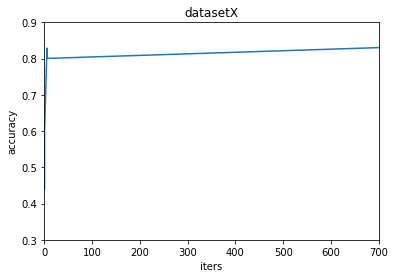

In [83]:
####3.2####
logisticReg_accuracy_vs_iterations(X_1 ,Y_1, tol_1,lrn_rates_1)

[316, 270, 225, 180, 135, 90, 45]
[0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7200000000000001, 0.7142857142857143, 0.7257142857142858]


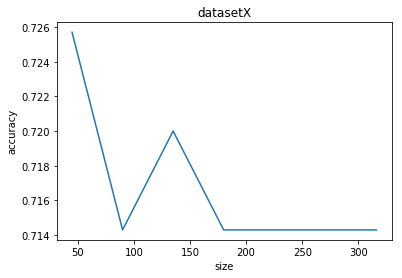

In [84]:
#TRAIN TEST#
####3.3#### NB
accuracy_size_bayes_train_test(X_1,Y_1,7,0.9,tag_1)


[316, 270, 225, 180, 135, 90, 45]
[0.7428571428571429, 0.7714285714285714, 0.7828571428571427, 0.7542857142857142, 0.7542857142857142, 0.76, 0.7142857142857144]


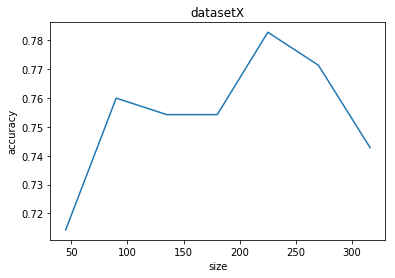

In [85]:
####3.3#### LR with armijo
accuracy_size_LR_train_test_armijo(X_1,Y_1,7,0.9,tol_1)


[316, 270, 225, 180, 135, 90, 45]
[0.8571428571428573, 0.8285714285714286, 0.8342857142857143, 0.8228571428571427, 0.8, 0.8057142857142857, 0.7542857142857142]


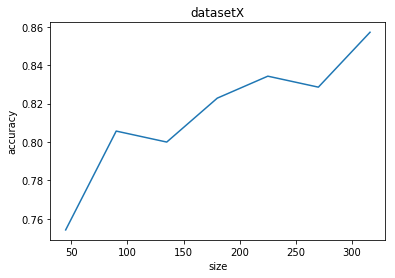

In [86]:
####3.3#### LR with rates
accuracy_size_LRrate_train_test(X_1,Y_1,7,0.9, tol_1,rate_1)

[351, 300, 250, 200, 150, 100, 50]
[0.7566841046277666, 0.758, 0.7615999999999999, 0.762, 0.7413333333333332, 0.752, 0.704]


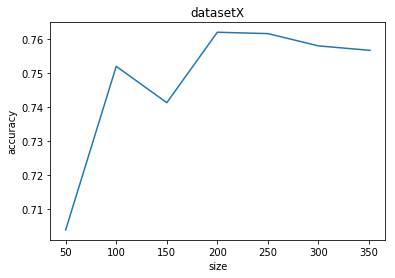

In [87]:
#CROSS VALIDATION#
####3.3#### NB
accuracy_size_bayes_CV(X_1,Y_1,7,tag_1)


[351, 300, 250, 200, 150, 100, 50]
[0.8325875251509055, 0.8293333333333333, 0.8176, 0.8210000000000001, 0.8386666666666667, 0.8219999999999998, 0.796]


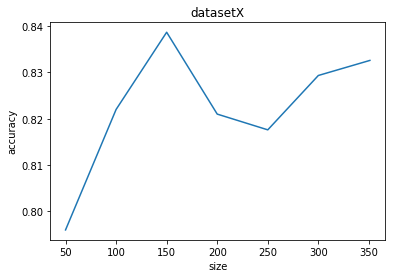

In [88]:
####3.3#### LR with armijo
accuracy_size_logistic_Armijo_CV(X_1,Y_1,7, tol_1)


[351, 300, 250, 200, 150, 100, 50]
[0.8394285714285713, 0.836, 0.8296000000000001, 0.844, 0.8320000000000001, 0.8119999999999999, 0.776]


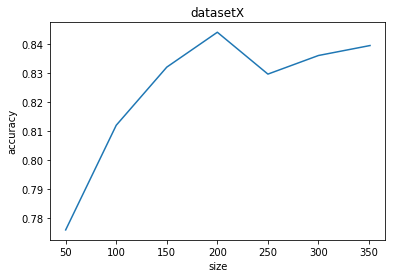

In [89]:
####3.3#### LR with rates
accuracy_size_logistic_lr_CV(X_1,Y_1,7, tol_1, rate_1)

In [142]:
###### DATASET 2 #####
print ("Test results for Dataset 2")
rate_2= 0.01
tol_2= 0.0001
lrn_rates_2 = [0.001, 0.005,0.0075,0.009,0.0099,0.01,0.05,0.1]

Test results for Dataset 2


In [145]:
########## dataset 2 tests together: ############

####3.1####
mean_accuracies(X_2,Y_2,tag_2,rate_2,tol_2)

KeyboardInterrupt: 

[0.001, 0.005, 0.0075, 0.009, 0.0099, 0.01, 0.05, 0.1]
[1000, 1000, 1000, 1000, 1, 1, 1, 1]
[0.830017826358213, 0.837079957229051, 0.8377759249415572, 0.8382733053967986, 0.838605101209484, 0.8394337443793882, 0.7510775394921214, 0.7510771987490552]


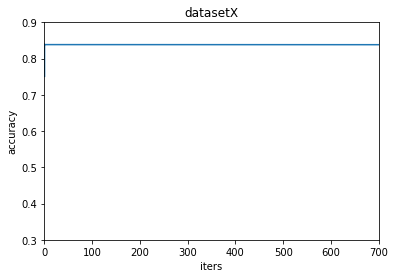

In [141]:
####3.2####
logisticReg_accuracy_vs_iterations(X_2 ,Y_2, tol_2,lrn_rates_2)

In [ ]:
#TRAIN TEST#
####3.3#### NB
accuracy_size_bayes_train_test(X_2,Y_2,7,0.9,tag_2)

In [ ]:
####3.3#### LR with armijo
accuracy_size_LR_train_test_armijo(X_2,Y_2,7,0.9,tol_2)

In [ ]:
####3.3#### LR with rates
accuracy_size_LRrate_train_test(X_2,Y_2,7,0.9, tol_2,rate_2)

[30162, 25853, 21544, 17235, 12926, 8617, 4308]
[0.8063259796582984, 0.8070939351920602, 0.8051243289670538, 0.8066608645198723, 0.8053232148707293, 0.8045962297993705, 0.8034368389424695]


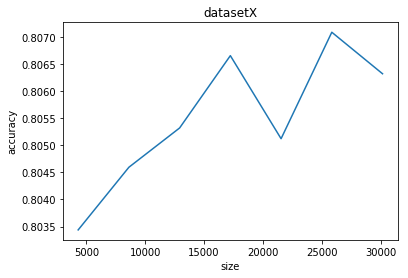

In [96]:
#CROSS VALIDATION#
####3.3#### NB
accuracy_size_bayes_CV(X_2,Y_2,7,tag_2)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in log1p
/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log1p
/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


[30162, 25853, 21544, 17235, 12926, 8617, 4308]
[0.7510773746164443, 0.751417685373009, 0.7502785860088997, 0.7509370467072818, 0.7486617390771017, 0.7513525618323407, 0.7482352846067407]


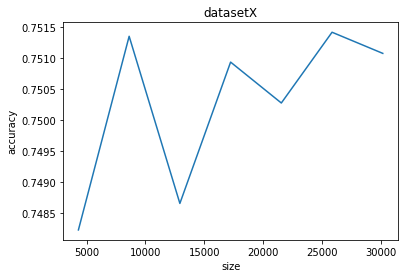

In [97]:
####3.3#### LR with armijo
accuracy_size_logistic_Armijo_CV(X_2,Y_2,7, tol_2)


/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in log1p
/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log1p
/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


[30162, 25853, 21544, 17235, 12926, 8617, 4308]
[0.7510775087153283, 0.7503036282915396, 0.7514110713406092, 0.7500435161009574, 0.7513536689898441, 0.7517000241040757, 0.7492563818578191]


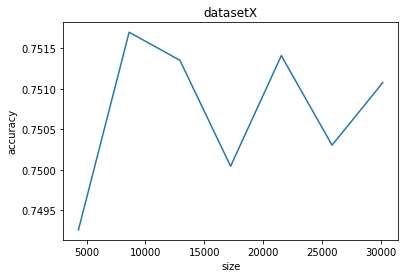

In [98]:
####3.3#### LR with rates
accuracy_size_logistic_lr_CV(X_2,Y_2,7, tol_2, rate_2)

In [100]:
###### DATASET 3 #####
print ("Test results for Dataset 3")
rate_3= 0.00015
tol_3= 0.000001
lrn_rates_3 = [0.00001, 0.0001,0.00015,0.0002,0.00025,0.0005, 0.001, 0.005, 0.01] 

Test results for Dataset 3


In [101]:
########## dataset 3 tests together: ############

####3.1####
mean_accuracies(X_3,Y_3,tag_3,rate_3,tol_3)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


mean accuracy bayes: 0.9676470588235295
mean accuracy logistic regression (with armijo): 0.6500477672820952
mean accuracy logistic regression (with rates): 0.864796049806784


[1e-05, 0.0001, 0.00015, 0.0002, 0.00025, 0.0005, 0.001, 0.005, 0.01]
[1000, 1000, 936, 5, 3, 2, 2, 1, 1]
[0.8624087591240877, 0.8609167024474023, 0.862376556462001, 0.7923035637612709, 0.6916058394160584, 0.6007406612279949, 0.415650493774152, 0.6499355946758266, 0.6500322026620867]


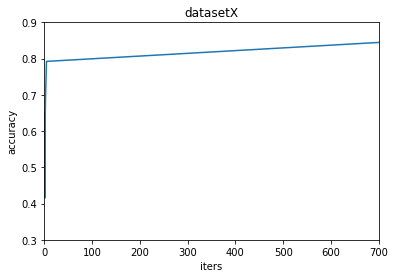

In [102]:
####3.2####
logisticReg_accuracy_vs_iterations(X_3 ,Y_3, tol_3,lrn_rates_3)


[615, 527, 439, 351, 263, 175, 87]
[0.9558823529411764, 0.9558823529411764, 0.9558823529411764, 0.9558823529411764, 0.9558823529411764, 0.9588235294117646, 0.9558823529411764]


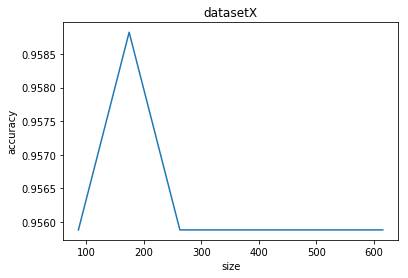

In [120]:
#TRAIN TEST#
####3.3#### NB
accuracy_size_bayes_train_test(X_3,Y_3,7,0.9,tag_3)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


[615, 527, 439, 351, 263, 175, 87]
[0.6176470588235294, 0.6176470588235294, 0.6176470588235294, 0.6176470588235294, 0.6176470588235294, 0.6176470588235294, 0.6176470588235294]


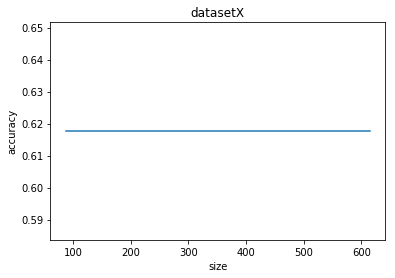

In [104]:
####3.3#### LR with armijo
accuracy_size_LR_train_test_armijo(X_3,Y_3,7,0.9,tol_3)


[615, 527, 439, 351, 263, 175, 87]
[0.8823529411764707, 0.8823529411764707, 0.8794117647058824, 0.8911764705882353, 0.8823529411764707, 0.8764705882352942, 0.8970588235294118]


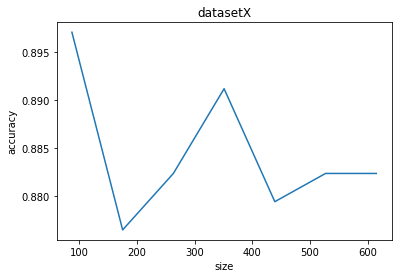

In [119]:
####3.3#### LR with rates
accuracy_size_LRrate_train_test(X_3,Y_3,7,0.9, tol_3,rate_3)

[683, 585, 487, 390, 292, 195, 97]
[0.9680893087161874, 0.9675213675213674, 0.964691773616663, 0.9661538461538463, 0.9684979544126243, 0.9682051282051283, 0.9504210526315789]


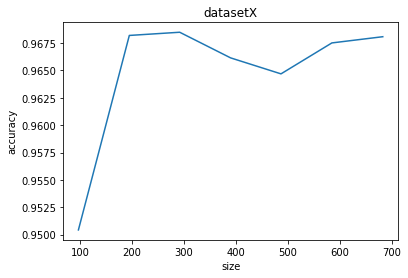

In [106]:
#CROSS VALIDATION#
####3.3#### NB
accuracy_size_bayes_CV(X_3,Y_3,7,tag_3)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


[683, 585, 487, 390, 292, 195, 97]
[0.6500794332331472, 0.6502564102564102, 0.6521354933726068, 0.6579487179487179, 0.6354178842781999, 0.633846153846154, 0.6556842105263159]


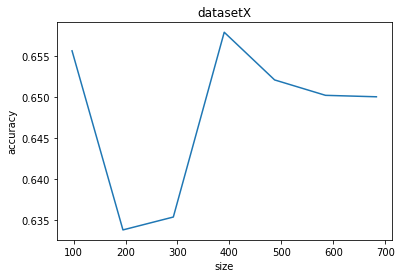

In [107]:
####3.3#### LR with armijo
accuracy_size_logistic_Armijo_CV(X_3,Y_3,7, tol_3)


[683, 585, 487, 390, 292, 195, 97]
[0.8641348218119363, 0.8683760683760683, 0.8710835261939828, 0.8615384615384615, 0.8500876680303915, 0.841025641025641, 0.8388421052631578]


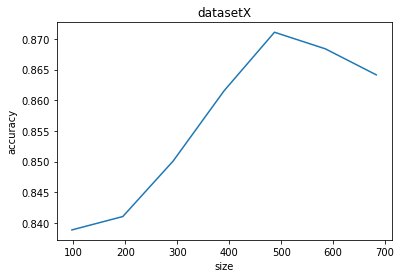

In [108]:
####3.3#### LR with rates
accuracy_size_logistic_lr_CV(X_3,Y_3,7, tol_3, rate_3)

In [110]:
###### DATASET 4 #####
print ("Test results for Dataset 4")
rate_4= 0.0000025
tol_4= 0.0000001
lrn_rates_4 = [0.000001,0.0000025, 0.000005,0.0000075,0.00001,0.00005, 0.0001, 0.0005, 0.001] 
   

Test results for Dataset 4


In [111]:
########## dataset 4 tests together: ############

####3.1####
mean_accuracies(X_4,Y_4,tag_4,rate_4,tol_4)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


mean accuracy bayes: 0.7407932310946589
mean accuracy logistic regression (with armijo): 0.26469063987308306
mean accuracy logistic regression (with rates): 0.7381041776837651


[1e-06, 2.5e-06, 5e-06, 7.5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001]
[1000, 1000, 653, 151, 16, 3, 2, 1, 1]
[0.6895293495505024, 0.7417239555790587, 0.7352723426758329, 0.7515600211528292, 0.682971972501322, 0.5467477525118986, 0.34849286092014814, 0.26488630354309894, 0.26456901110523534]


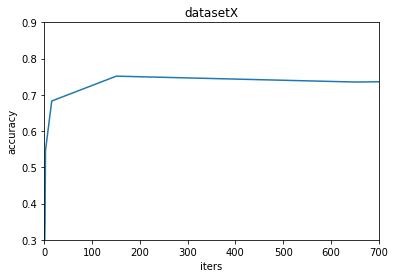

In [112]:
####3.2####
logisticReg_accuracy_vs_iterations(X_4 ,Y_4, tol_4,lrn_rates_4)


[276, 236, 197, 157, 118, 78, 39]
[0.8333333333333334, 0.8400000000000001, 0.8333333333333334, 0.8266666666666668, 0.8333333333333334, 0.7933333333333333, 0.8466666666666667]


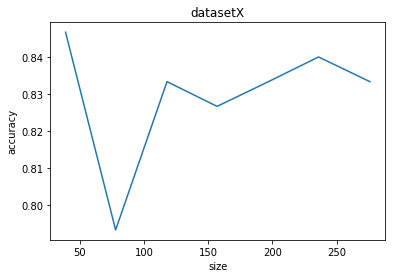

In [113]:
#TRAIN TEST#
####3.3#### NB
accuracy_size_bayes_train_test(X_4,Y_4,7,0.9,tag_4)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


[276, 236, 197, 157, 118, 78, 39]
[0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996]


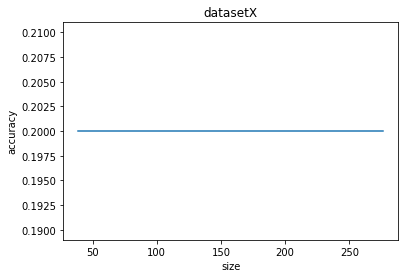

In [114]:
####3.3#### LR with armijo
accuracy_size_LR_train_test_armijo(X_4,Y_4,7,0.9,tol_4)


[276, 236, 197, 157, 118, 78, 39]
[0.8, 0.8, 0.8, 0.8, 0.7799999999999999, 0.7133333333333333, 0.5866666666666667]


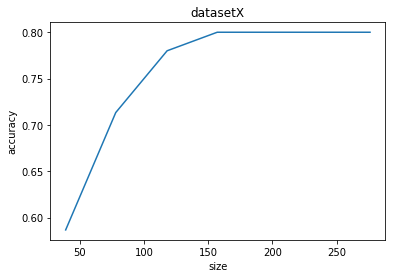

In [115]:
####3.3#### LR with rates
accuracy_size_LRrate_train_test(X_4,Y_4,7,0.9, tol_4,rate_4)

[306, 262, 218, 174, 131, 87, 43]
[0.7385510312004231, 0.7487953555878084, 0.7405919661733615, 0.7161680672268907, 0.7281481481481481, 0.7137254901960783, 0.6744444444444444]


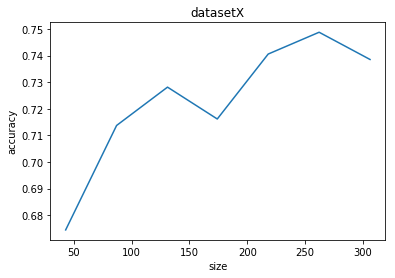

In [116]:
#CROSS VALIDATION#
####3.3#### NB
accuracy_size_bayes_CV(X_4,Y_4,7,tag_4)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


[306, 262, 218, 174, 131, 87, 43]
[0.26479111581173986, 0.26542815674891146, 0.2670401691331924, 0.2714621848739495, 0.26695156695156697, 0.2828758169934641, 0.28944444444444445]


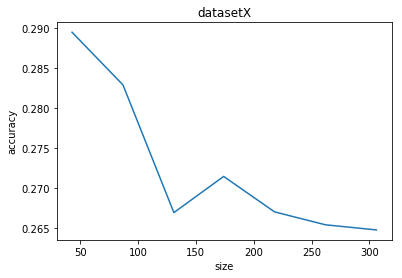

In [117]:
####3.3#### LR with armijo
accuracy_size_logistic_Armijo_CV(X_4,Y_4,7, tol_4)


[306, 262, 218, 174, 131, 87, 43]
[0.7398519301956635, 0.7427576197387518, 0.7311416490486259, 0.7183193277310924, 0.7128774928774929, 0.657516339869281, 0.5777777777777777]


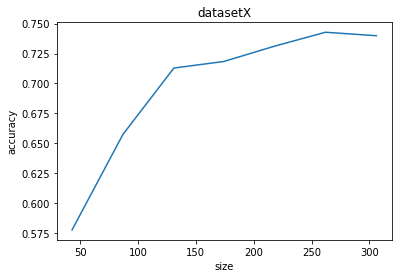

In [118]:
####3.3#### LR with rates
accuracy_size_logistic_lr_CV(X_4,Y_4,7, tol_4, rate_4)